<a href="https://colab.research.google.com/github/imAryanSingh/Wine-Quality-Prediction/blob/main/WineQualityPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np #used to create library
import pandas as pd #used to create dataframe this dataframe used to analyze data and processing
import matplotlib.pyplot as plt #
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#Loading KAGGLE dataset to a Pandas DataFrame
dataset = pd.read_csv('/content/winequality-red.csv')

In [ ]:
#few rows of the dataset
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#No of rows & columns in dataset
dataset.shape

(1599, 12)

In [ ]:
#No of element in dataset
dataset.size

19188

In [ ]:
#Checking are there Null values
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
#Basic Description About Dataset like count,mean,min,max,etc.
dataset.describe()
#ClicK On "SUGGESTED CHARTS" It Show More Visual Information
#25%(Percentile) of the values are less then 7.10
#50%(Percentile) of the values are less then 7.9

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<Axes: >

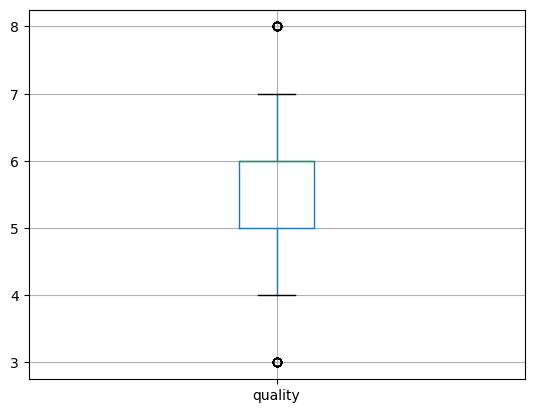

In [ ]:
#VISUALIZATION's:-
#using Boxplot of Quality
dataset[['quality']].boxplot()

Axes(0.125,0.11;0.775x0.77)


Text(0, 0.5, 'Count')

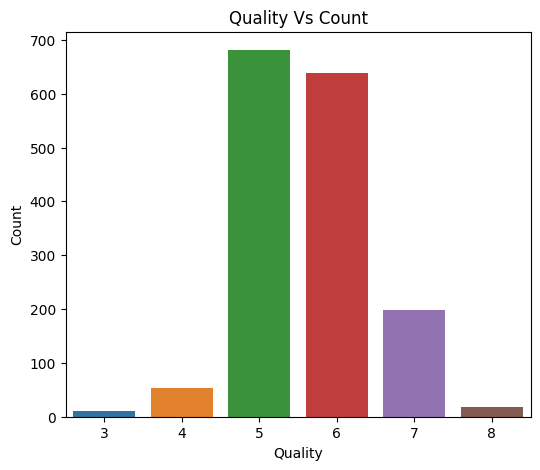

In [ ]:
#14)This Bar Graph Shows which USPS(United States Postal Service code) have Most Popular Cities
plt.figure(figsize=(6,5))
print(sns.countplot(x='quality',data=dataset))
plt.title('Quality Vs Count')
plt.xlabel('Quality')
plt.ylabel('Count')

<Figure size 600x500 with 0 Axes>

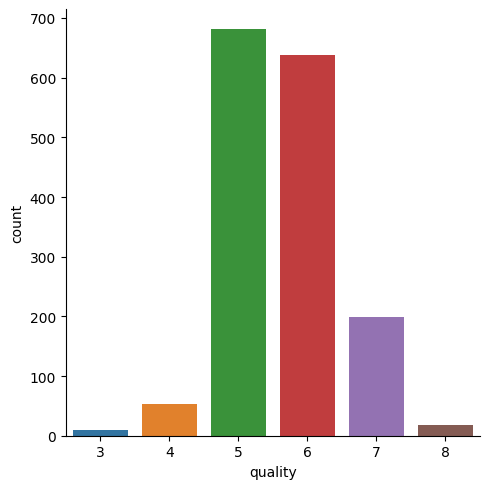

In [ ]:
#No of values for each quality
plt.figure(figsize=(6,5))
sns.catplot(x='quality', data = dataset, kind = 'count')
#Need to find Total quality values

<Axes: xlabel='quality', ylabel='volatile acidity'>

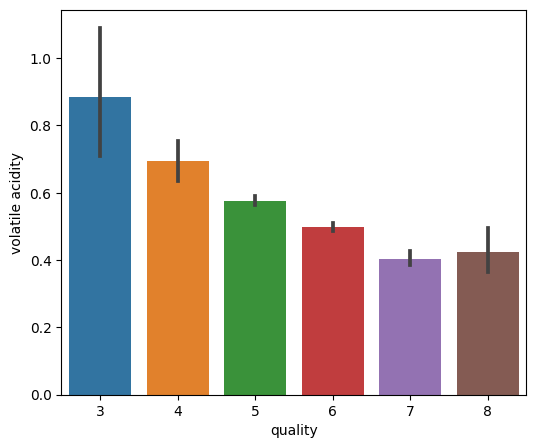

In [ ]:
# volatile acidity vs Quality
plt.figure(figsize=(6,5))
sns.barplot(x='quality', y = 'volatile acidity', data = dataset)
#It tells that Quality of Wine Inversaly Proportional to volatile Acidity

<Axes: xlabel='quality', ylabel='citric acid'>

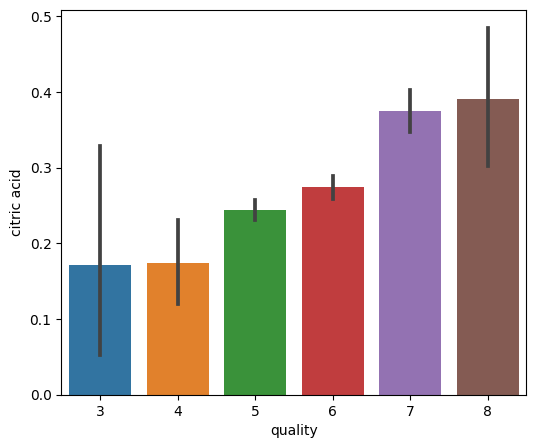

In [ ]:
# citric acid vs Quality
plot = plt.figure(figsize=(6,5))
sns.barplot(x='quality', y = 'citric acid', data = dataset)
#It tells that Quality of Wine Directly Proportional to volatile Acidity

<Axes: xlabel='quality', ylabel='residual sugar'>

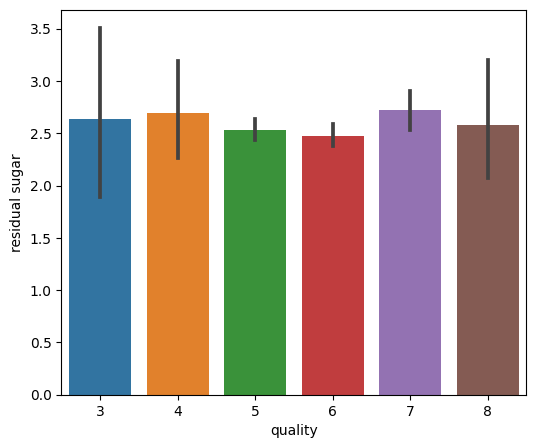

In [ ]:
# citric acid vs Quality
plot = plt.figure(figsize=(6,5))
sns.barplot(x='quality', y = 'residual sugar', data = dataset)
#It tells that Quality of Wine Directly Proportional to volatile Acidity

<Axes: xlabel='quality', ylabel='alcohol'>

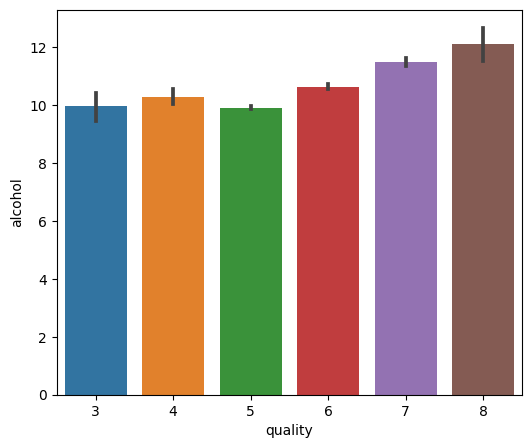

In [ ]:
# citric acid vs Quality
plot = plt.figure(figsize=(6,5))
sns.barplot(x='quality', y = 'alcohol', data = dataset)

In [ ]:
#8)Correlation among the variables are listed here
correlation=dataset.corr()
#ClicK On "SUGGESTED CHARTS" It Show More Visual Information
#1.Positive Correlation->If 2 values are +ve correlated then if one value increase other also increase
#2.Negative Correlation->If 2 values are +ve correlated then if one value DECREASE other also increase

<Axes: >

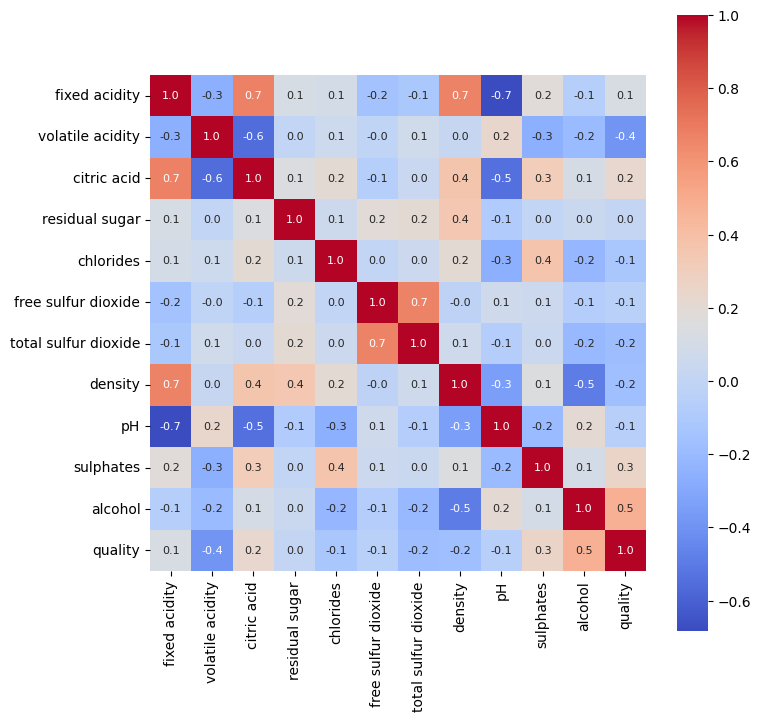

In [ ]:
#Constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'coolwarm')
#fmt means we want value upto 1 float value
#annot=True means we want annotation

In [ ]:
#We are Now Dropping the Data Column
# separate the data and Label
X = dataset.drop('quality',axis=1)
print(X)
#to drop row we write ('row_name',axis=0)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

Label Binarization-> means we r creating value into 2 values good 1 (7 and 8) or bad 0 (6>1)

In [ ]:
# We are replacing value if good then replace to 1
Y = dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

Training and testing Data

In [ ]:
#5.train_test_split- we split our x and y variables into training and testing data
#Whenever train_test_split is taken into consideration, We have to consider 4 new variables
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
#when i give random state 0 it fix my output data check 1:10:00
#for every value of random state accuracy changes 48 give 100 %accuracy
#by default training variable gets 75% from x and y and testing data gets the remaining 25%

In [ ]:
print(X.shape) #100%
print(X_train.shape) #75%
print(X_test.shape) #25%


print(Y. shape) #100%
print(Y_train.shape) #75%
print(Y_test.shape) #25%

(1599, 11)
(1279, 11)
(320, 11)
(1599,)
(1279,)
(320,)


Model Training

Random Model Classifier

In [ ]:
#Apply a CLASSIFIER, Regressor or Clusterer
model = RandomForestClassifier()

In [ ]:
#Model Fitting
#We are plotting the values in the Random Model Classifier Library
model.fit(X_train, Y_train)

RandomForestClassifier()

Model Evaluation

Checking Accuracy %

In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
print(X_test_prediction)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print(test_data_accuracy)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1]
0.91875


In [ ]:
print('Accuracy : ', test_data_accuracy*100)

Accuracy :  91.875


Building Predicting System

In [ ]:
input_data = (8,0.6,0.6,6.8,0.07,20.0,100.0,0.9999,3.33,0.89,9.6)
# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Bad Quality Wine


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
